In [1]:
#Importing the basic librarires

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

df = pd.read_csv('Walmart.csv')

#df.drop(['car name'], axis=1, inplace=True)
display(df.head())

original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106


Inference: The Datset consists of 8 features & 6435 samples.


In [3]:
# Reframing the columns

df.Date=pd.to_datetime(df.Date, dayfirst=True)

df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

# df['Monthly_Quarter'] = df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
#                                       8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})

df.drop(['Date'], axis=1, inplace=True)#,'month'

target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1    1643690.90             0        42.31       2.572  211.096358   
1      1    1641957.44             1        38.51       2.548  211.242170   
2      1    1611968.17             0        39.93       2.514  211.289143   
3      1    1409727.59             0        46.63       2.561  211.319643   
4      1    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  weekday  month  year  
0         8.106        4      2  2010  
1         8.106        4      2  2010  
2         8.106        4      2  2010  
3         8.106        4      2  2010  
4         8.106        4      3  2010

In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int32  
 8   month         6435 non-null   int32  
 9   year          6435 non-null   int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 427.5 KB


In [5]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

weekday            1
Holiday_Flag       2
year               3
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [6]:
#Checking the stats of all the columns

display(df.describe())

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  weekday        month         year  
count  6435.000000   6435.000000   6435.0  6435.000000  6435.000000  
mean    171.578394      7.999151      4.0     6.447552  2010.965035  
std      39.356712      1.875885      0.0     3.238308     0.797019  
min     126.064000      3.879000      4.0     1.000000  2010.000000  
25%     131.735000      6.891000      4.0     4.000000  2010.000000  
50%     182.616521      7.874000      4.0     6.000000  2011.000000  
75%     212.743293      8.622000      4.0     9.000000  2012.000000  
max     227.232807     14.313000      4.0    12.000000  2012.000000

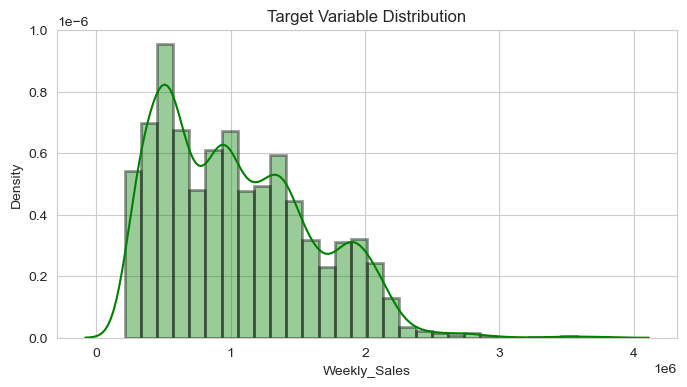

In [7]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

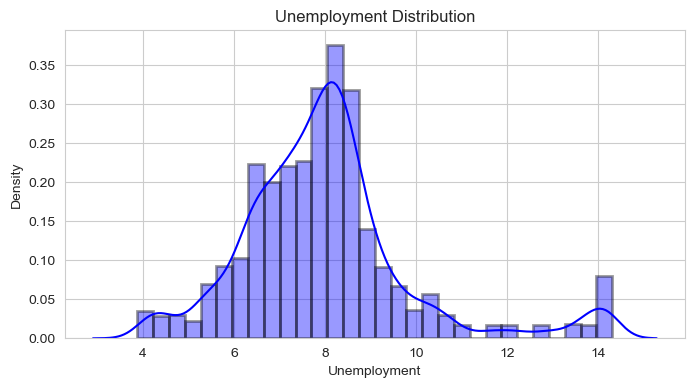

In [8]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df['Unemployment'], color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Unemployment Distribution')
plt.show()

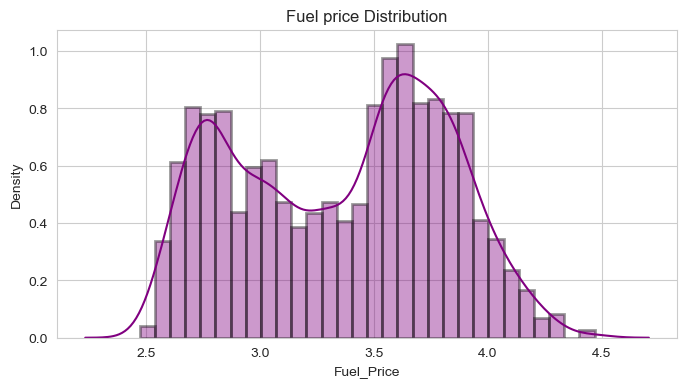

In [9]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df['Fuel_Price'], color='purple',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Fuel price Distribution')
plt.show()

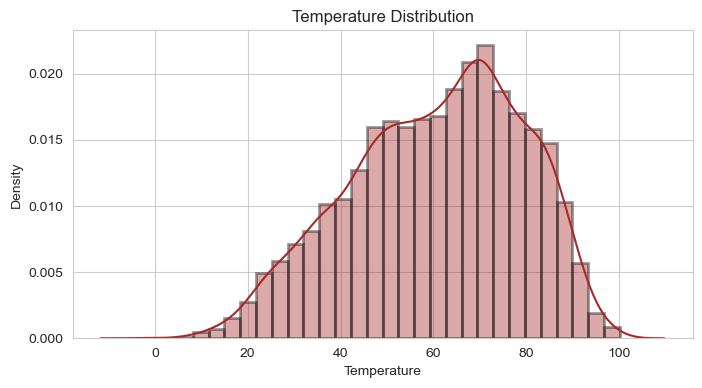

In [10]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df['Temperature'], color='brown',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Temperature Distribution')
plt.show()

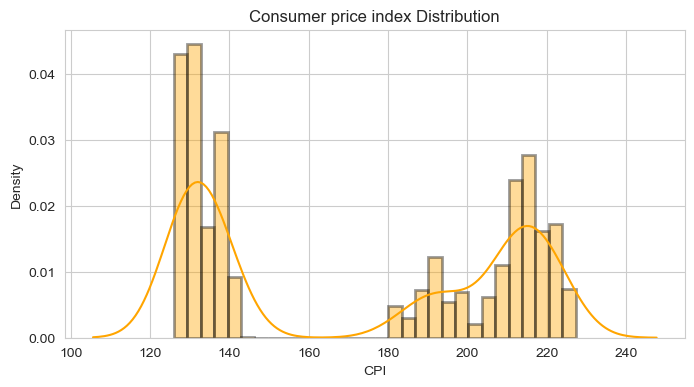

In [11]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df['CPI'], color='orange',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Consumer price index Distribution')
plt.show()

In [12]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 4 numerical & 5 categorical features.


                               Visualising Categorical Features:                                


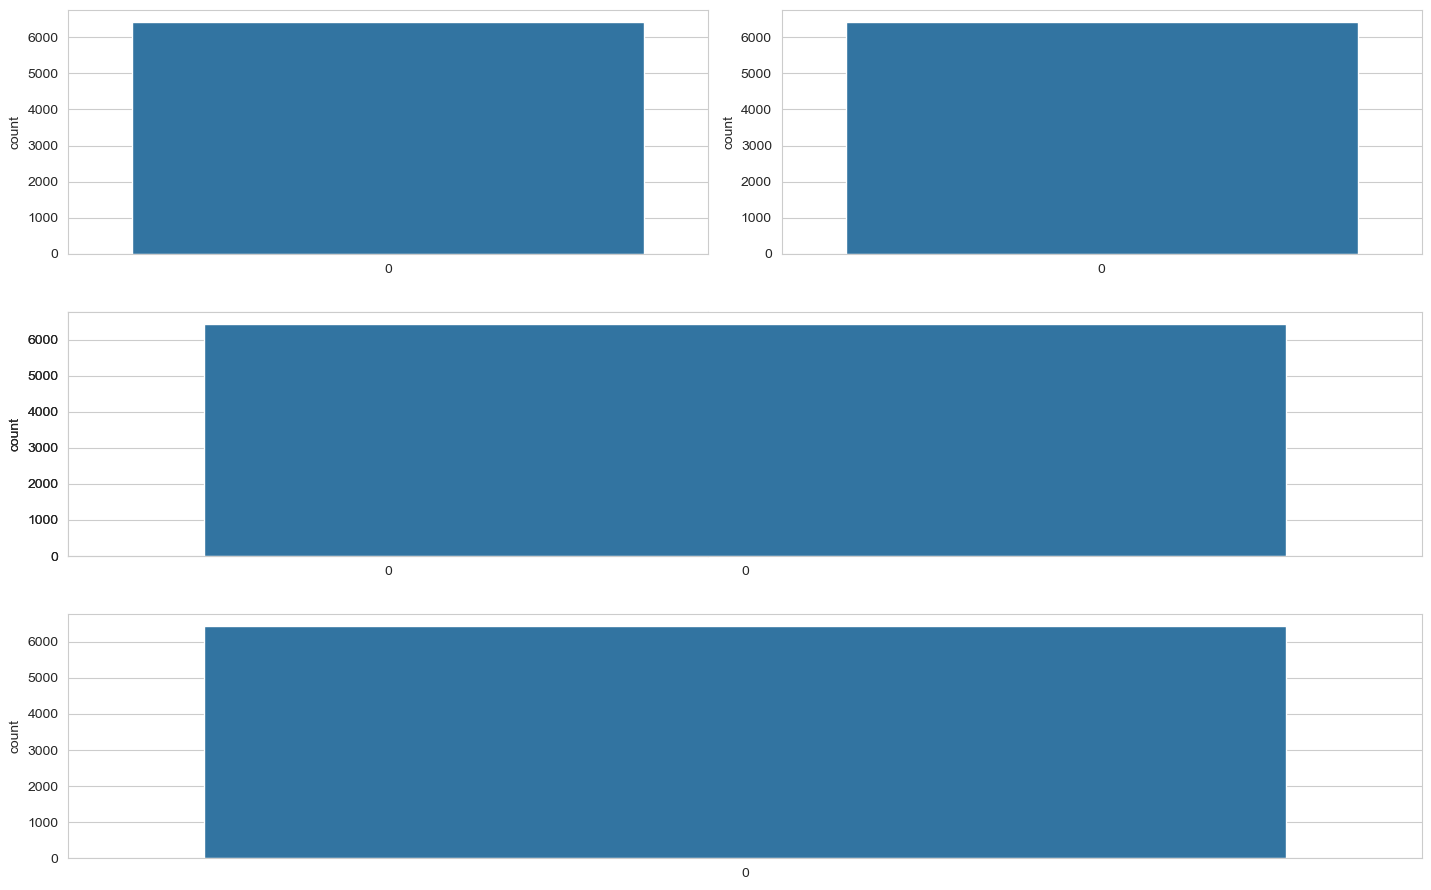

In [13]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(df[cf[i]])

plt.tight_layout()
plt.show()

In [14]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

              Total Null Values  Percentage
Store                         0         0.0
Weekly_Sales                  0         0.0
Holiday_Flag                  0         0.0
Temperature                   0         0.0
Fuel_Price                    0         0.0
CPI                           0         0.0
Unemployment                  0         0.0
weekday                       0         0.0
month                         0         0.0
year                          0         0.0


In [15]:
#Converting categorical Columns to Numeric

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)

df3.shape

One-Hot Encoding on features:
Holiday_Flag

Dummy Encoding on features:
year
month
Store


(6435, 64)

In [16]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0    1643690.90         False        42.31       2.572  211.096358   
1    1641957.44          True        38.51       2.548  211.242170   
2    1611968.17         False        39.93       2.514  211.289143   
3    1409727.59         False        46.63       2.561  211.319643   
4    1554806.68         False        46.50       2.625  211.350143   

   Unemployment  weekday  year_2011  year_2012  month_2  ...  Store_36  \
0         8.106        4      False      False     True  ...     False   
1         8.106        4      False      False     True  ...     False   
2         8.106        4      False      False     True  ...     False   
3         8.106        4      False      False     True  ...     False   
4         8.106        4      False      False    False  ...     False   

   Store_37  Store_38  Store_39  Store_40  Store_41  Store_42  Store_43  \
0     False     False     False     False     False     False     False   
1     False     False     False     False     False     False     False   
2     False     False     False     False     False     False     False   
3     False     False     False     False     False     False     False   
4     False     False     False     False     False     False     False   

   Store_44  Store_45  
0     False     False  
1     False     False  
2     False     False  
3     False     False  
4     False     False  

[5 rows x 64 columns]


Inference:
Before removal of outliers, The dataset had 6435 samples.
After removal of outliers, The dataset now has 5953 samples.


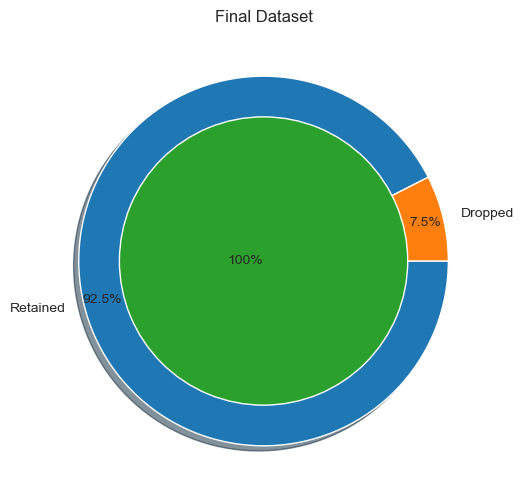


Inference: After the cleanup process, 482 samples were dropped, while retaining 7.49% of the data.


In [17]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False,
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

In [18]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))

df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (5953, 63) (5953,) 
Training set  --->  (4762, 63) (4762,) 
Testing set   --->  (1191, 63)  (1191,)


In [19]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


Holiday_Flag   Temperature    Fuel_Price           CPI  Unemployment  \
count  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03   
mean  -1.492110e-18 -1.305596e-16 -2.991680e-16 -2.762268e-16 -4.267434e-16   
std    1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00   
min   -2.742012e-01 -2.961575e+00 -1.871814e+00 -1.248731e+00 -2.762670e+00   
25%   -2.742012e-01 -7.314248e-01 -9.886990e-01 -1.076949e+00 -6.783836e-01   
50%   -2.742012e-01  1.062547e-01  1.663112e-01  3.842133e-01  9.596435e-02   
75%   -2.742012e-01  7.731979e-01  8.427860e-01  9.933828e-01  6.138095e-01   
max    3.646958e+00  2.170008e+00  2.469806e+00  1.340791e+00  2.575491e+00   

       weekday     year_2011     year_2012       month_2       month_3  ...  \
count   4762.0  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03  ...   
mean       0.0 -5.520807e-17  1.939743e-17  7.460550e-18  3.618367e-17  ...   
std        0.0  1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00  ...   
min        0.0 -7.526270e-01 -6.371530e-01 -2.982532e-01 -3.166659e-01  ...   
25%        0.0 -7.526270e-01 -6.371530e-01 -2.982532e-01 -3.166659e-01  ...   
50%        0.0 -7.526270e-01 -6.371530e-01 -2.982532e-01 -3.166659e-01  ...   
75%        0.0  1.328679e+00  1.569482e+00 -2.982532e-01 -3.166659e-01  ...   
max        0.0  1.328679e+00  1.569482e+00  3.352856e+00  3.157903e+00  ...   

           Store_36      Store_37      Store_38      Store_39      Store_40  \
count  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03   
mean   1.529413e-17  4.923963e-17  8.952659e-18  1.342899e-17 -3.730275e-18   
std    1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00   
min   -1.573123e-01 -1.587085e-01 -4.351484e-02 -1.580118e-01 -1.307162e-01   
25%   -1.573123e-01 -1.587085e-01 -4.351484e-02 -1.580118e-01 -1.307162e-01   
50%   -1.573123e-01 -1.587085e-01 -4.351484e-02 -1.580118e-01 -1.307162e-01   
75%   -1.573123e-01 -1.587085e-01 -4.351484e-02 -1.580118e-01 -1.307162e-01   
max    6.356783e+00  6.300861e+00  2.298067e+01  6.328643e+00  7.650163e+00   

           Store_41      Store_42      Store_43      Store_44      Store_45  
count  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03  
mean  -1.492110e-17  3.730275e-17 -2.984220e-17 -4.774752e-17  2.499284e-17  
std    1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00  
min   -1.537717e-01 -1.573123e-01 -1.628322e-01 -1.551967e-01 -1.523346e-01  
25%   -1.537717e-01 -1.573123e-01 -1.628322e-01 -1.551967e-01 -1.523346e-01  
50%   -1.537717e-01 -1.573123e-01 -1.628322e-01 -1.551967e-01 -1.523346e-01  
75%   -1.537717e-01 -1.573123e-01 -1.628322e-01 -1.551967e-01 -1.523346e-01  
max    6.503146e+00  6.356783e+00  6.141290e+00  6.443435e+00  6.564495e+00  

[8 rows x 63 columns]


                                          Standardardization on Testing set                                          


Holiday_Flag  Temperature   Fuel_Price          CPI  Unemployment  \
count   1191.000000  1191.000000  1191.000000  1191.000000   1191.000000   
mean       0.005646     0.044406     0.075113     0.021041     -0.050953   
std        1.009885     1.000220     0.971917     1.004644      1.010206   
min       -0.274201    -2.857425    -1.780457    -1.248731     -2.762670   
25%       -0.274201    -0.657516    -0.852751    -1.077025     -0.699355   
50%       -0.274201     0.187351     0.298996     0.393492      0.058860   
75%       -0.274201     0.818764     0.844961     1.019967      0.611390   
max        3.646958     2.035481     2.469806     1.345814      2.575491   

       weekday    year_2011    year_2012      month_2      month_3  ...  \
count   1191.0  1191.000000  1191.000000  1191.000000  1191.000000  ...   
mean       0.0     0.052984     0.065042     0.026699    -0.019096  ...   
std        0.0     1.014188     1.028250     1.040072     0.972715  ...   
min        0.0    -0.752627    -0.637153    -0.298253    -0.316666  ...   
25%        0.0    -0.752627    -0.637153    -0.298253    -0.316666  ...   
50%        0.0    -0.752627    -0.637153    -0.298253    -0.316666  ...   
75%        0.0     1.328679     1.569482    -0.298253    -0.316666  ...   
max        0.0     1.328679     1.569482     3.352856     3.157903  ...   

          Store_36     Store_37     Store_38     Store_39     Store_40  \
count  1191.000000  1191.000000  1191.000000  1191.000000  1191.000000   
mean     -0.004168    -0.017693     0.111140    -0.010959    -0.000055   
std       0.987401     0.944330     1.881448     0.965939     1.000214   
min      -0.157312    -0.158708    -0.043515    -0.158012    -0.130716   
25%      -0.157312    -0.158708    -0.043515    -0.158012    -0.130716   
50%      -0.157312    -0.158708    -0.043515    -0.158012    -0.130716   
75%      -0.157312    -0.158708    -0.043515    -0.158012    -0.130716   
max       6.356783     6.300861    22.980668     6.328643     7.650163   

          Store_41     Store_42     Store_43     Store_44     Store_45  
count  1191.000000  1191.000000  1191.000000  1191.000000  1191.000000  
mean      0.030677    -0.004168    -0.056970     0.016556     0.045053  
std       1.093088     0.987401     0.810380     1.051077     1.134875  
min      -0.153772    -0.157312    -0.162832    -0.155197    -0.152335  
25%      -0.153772    -0.157312    -0.162832    -0.155197    -0.152335  
50%      -0.153772    -0.157312    -0.162832    -0.155197    -0.152335  
75%      -0.153772    -0.157312    -0.162832    -0.155197    -0.152335  
max       6.503146     6.356783     6.141290     6.443435     6.564495  

[8 rows x 63 columns]

                                       Correlation Matrix                                       


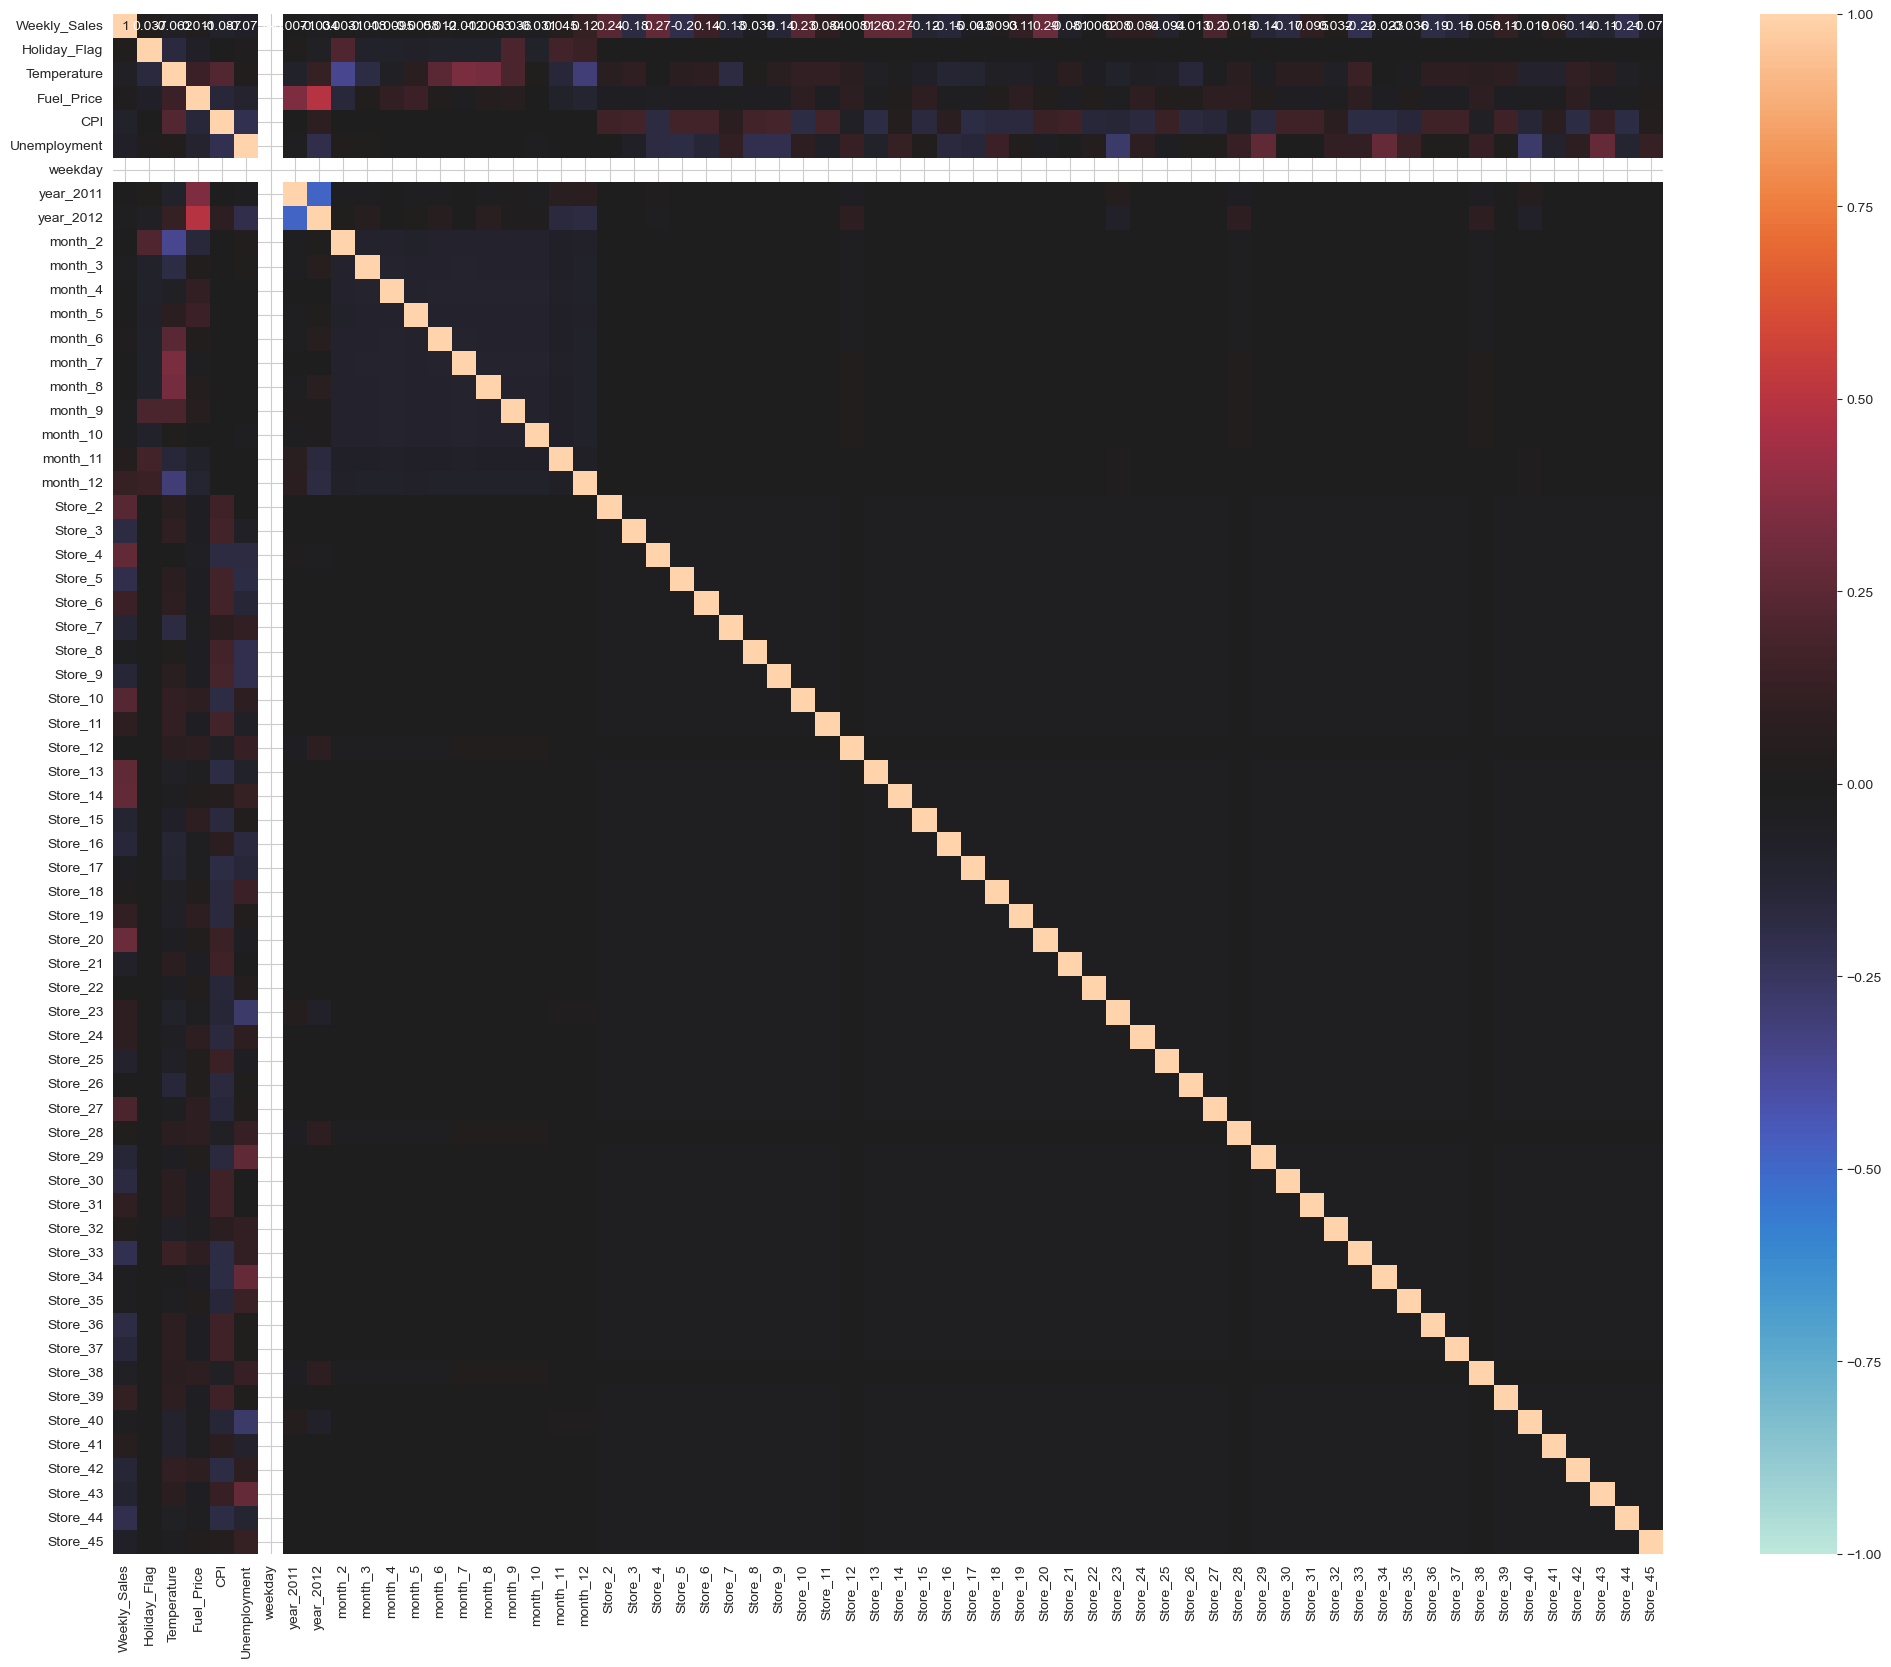

In [20]:
    #Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()            

In [21]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1155.
Date:                Tue, 01 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:35:44   Log-Likelihood:                -63223.
No. Observations:                4762   AIC:                         1.266e+05
Df Residuals:                    4699   BIC:                         1.270e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.048e+06   2059.199    508.743      0.000    1.04e+06    1.05e+06
Holiday_Flag  8059.9214   2279.678      3.536      0.000    3590.684    1.25e+04
Temperature   1.769e+04   7235.809      2.445      0.015    3504.204    3.19e+04
Fuel_Price   -1296.0299   6741.498     -0.192      0.848   -1.45e+04    1.19e+04
CPI           1.577e+05   7.06e+04      2.233      0.026    1.93e+04    2.96e+05
Unemployment -5.424e+04   7171.270     -7.564      0.000   -6.83e+04   -4.02e+04
weekday        3.57e-11   4.75e-10      0.075      0.940   -8.95e-10    9.66e-10
year_2011    -1.523e+04   7195.844     -2.116      0.034   -2.93e+04   -1120.441
year_2012    -2.805e+04   1.04e+04     -2.700      0.007   -4.84e+04   -7678.312
month_2       3.105e+04   3383.632      9.177      0.000    2.44e+04    3.77e+04
month_3       2.123e+04   4074.185      5.211      0.000    1.32e+04    2.92e+04
month_4       2.326e+04   4956.542      4.693      0.000    1.35e+04     3.3e+04
month_5       2.165e+04   5142.688      4.210      0.000    1.16e+04    3.17e+04
month_6        2.84e+04   5716.385      4.968      0.000    1.72e+04    3.96e+04
month_7       1.747e+04   6274.423      2.785      0.005    5171.630    2.98e+04
month_8        2.02e+04   6207.060      3.255      0.001    8034.143    3.24e+04
month_9       2761.7459   5723.463      0.483      0.629   -8458.925     1.4e+04
month_10      9450.4348   5144.900      1.837      0.066    -635.983    1.95e+04
month_11      4.162e+04   3902.022     10.666      0.000     3.4e+04    4.93e+04
month_12      8.575e+04   3975.296     21.570      0.000     7.8e+04    9.35e+04
Store_2       5.429e+04   2849.085     19.056      0.000    4.87e+04    5.99e+04
Store_3      -1.816e+05   3037.660    -59.778      0.000   -1.88e+05   -1.76e+05
Store_4       1.148e+05    2.3e+04      4.999      0.000    6.97e+04     1.6e+05
Store_5      -1.899e+05   3023.242    -62.806      0.000   -1.96e+05   -1.84e+05
Store_6      -7322.3757   3058.926     -2.394      0.017   -1.33e+04   -1325.446
Store_7      -1.284e+05   7132.924    -18.005      0.000   -1.42e+05   -1.14e+05
Store_8      -1.142e+05   3392.659    -33.653      0.000   -1.21e+05   -1.08e+05
Store_9      -1.589e+05   3194.275    -49.741      0.000   -1.65e+05   -1.53e+05
Store_10      1.075e+05   2.39e+04      4.503      0.000    6.07e+04    1.54e+05
Store_11     -3.776e+04   3058.338    -12.347      0.000   -4.38e+04   -3.18e+04
Store_12     -2928.8960   9460.509     -0.310      0.757   -2.15e+04    1.56e+04
Store_13      1.176e+05    2.4e+04      4.891      0.000    7.04e+04    1.65e+05
Store_14      9.566e+04   8660.998     11.045      0.000    7.87e+04    1.13e+05
Store_15     -9.031e+04   2.27e+04     -3.975      0.000   -1.35e+05   -4.58e+04
Store_16     -1.522e+05   7079.401    -21.498      0.000   -1.66e+05   -1.38e+05
Store

In [22]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,2,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')
    plt.xlabel('Errors')

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.2981121379


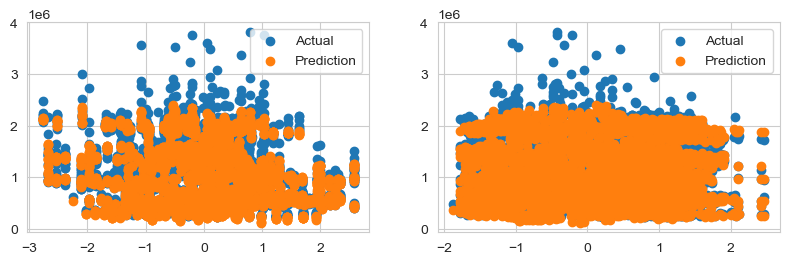



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9384326445587671
Residual Sum of Squares (RSS) on Training set  ---> 94883679991345.6
Mean Squared Error (MSE) on Training set       ---> 19925174294.696682
Root Mean Squared Error (RMSE) on Training set ---> 141156.55951707196

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9365084218587378
Residual Sum of Squares (RSS) on Training set  ---> 25865153262423.355
Mean Squared Error (MSE) on Training set       ---> 21717173184.234554
Root Mean Squared Error (RMSE) on Training set ---> 147367.47668408573

--------------------Residual Plots--------------------


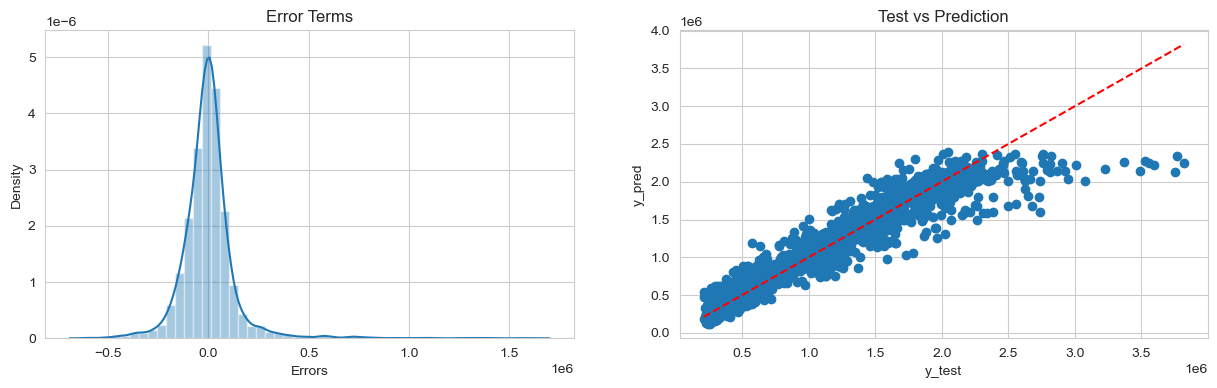

In [23]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.2981121379


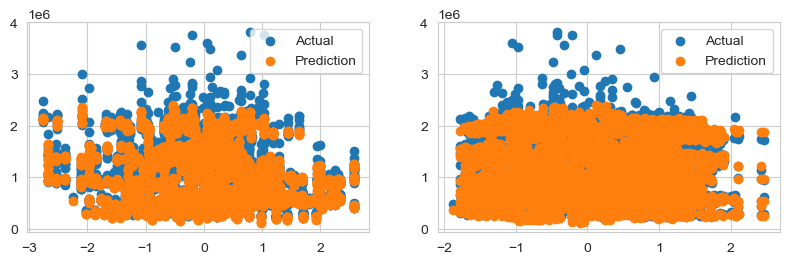



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9384318713109462
Residual Sum of Squares (RSS) on Training set  ---> 94884871671551.22
Mean Squared Error (MSE) on Training set       ---> 19925424542.534904
Root Mean Squared Error (RMSE) on Training set ---> 141157.44593373354

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9365318604979348
Residual Sum of Squares (RSS) on Training set  ---> 25855604846509.973
Mean Squared Error (MSE) on Training set       ---> 21709156042.409718
Root Mean Squared Error (RMSE) on Training set ---> 147340.2729819981

--------------------Residual Plots--------------------


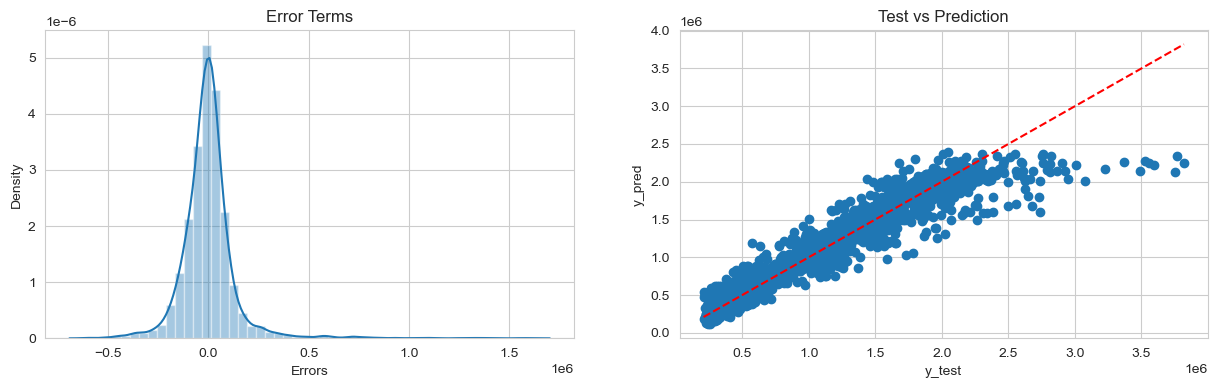

In [24]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.2981121379


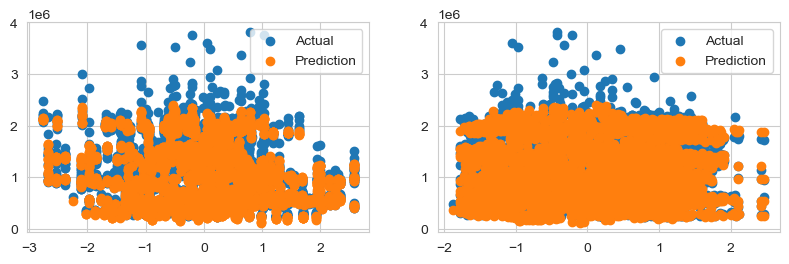



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.938432628191586
Residual Sum of Squares (RSS) on Training set  ---> 94883705215400.5
Mean Squared Error (MSE) on Training set       ---> 19925179591.642273
Root Mean Squared Error (RMSE) on Training set ---> 141156.57827973258

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9365071409713461
Residual Sum of Squares (RSS) on Training set  ---> 25865675069404.18
Mean Squared Error (MSE) on Training set       ---> 21717611309.32341
Root Mean Squared Error (RMSE) on Training set ---> 147368.9631819516

--------------------Residual Plots--------------------


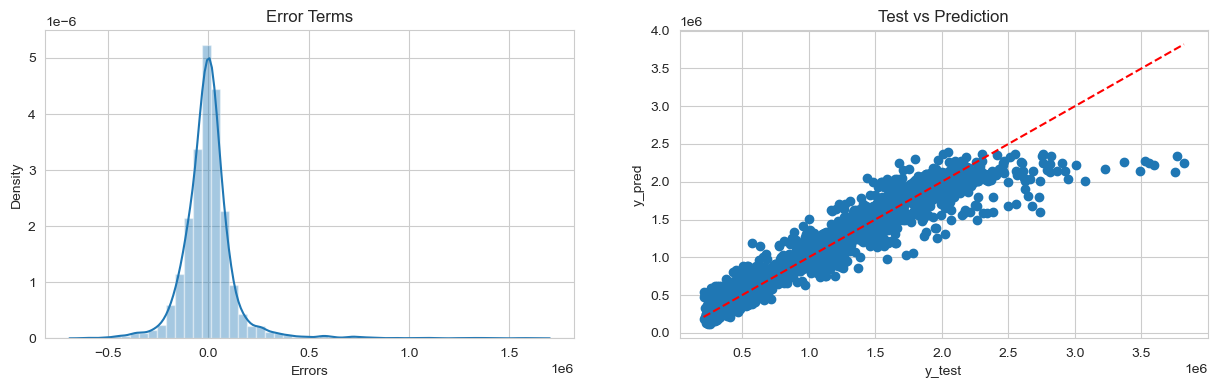

In [25]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.2981121379


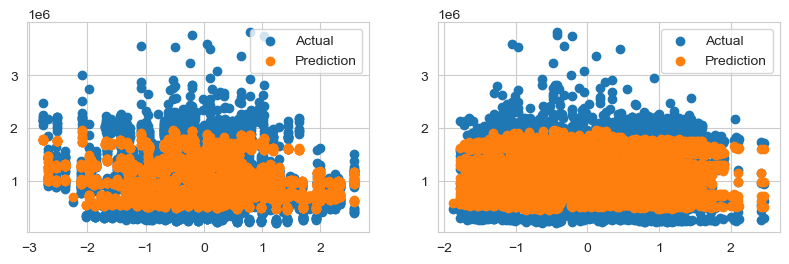



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.819978493266566
Residual Sum of Squares (RSS) on Training set  ---> 277437660169750.22
Mean Squared Error (MSE) on Training set       ---> 58260743420.77914
Root Mean Squared Error (RMSE) on Training set ---> 241372.6235942658

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8197469352173602
Residual Sum of Squares (RSS) on Training set  ---> 73431363388880.12
Mean Squared Error (MSE) on Training set       ---> 61655216951.200775
Root Mean Squared Error (RMSE) on Training set ---> 248304.6857213951

--------------------Residual Plots--------------------


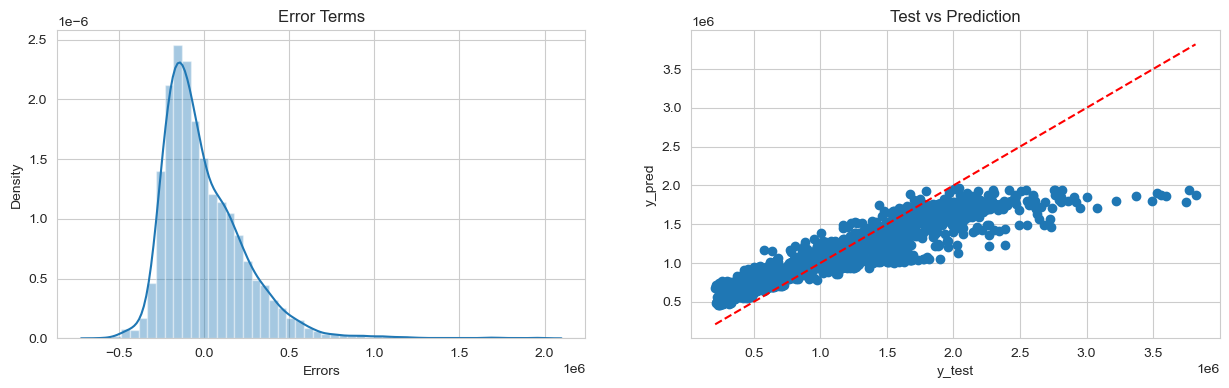

In [26]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

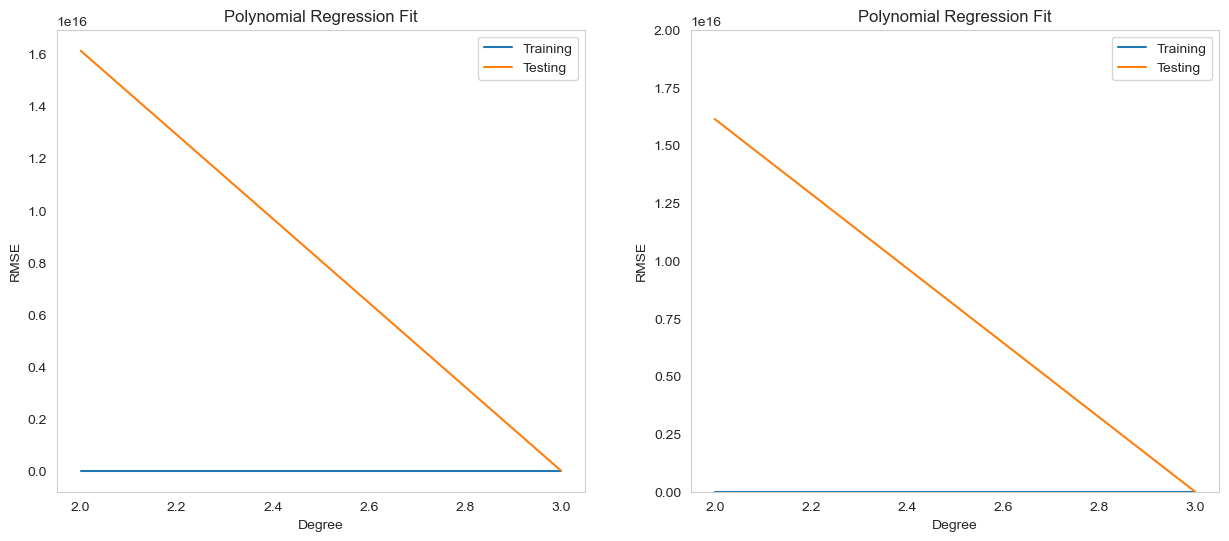

In [27]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=4

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)

    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))

    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,2e16])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 8.05992144e+03  1.76897834e+04 -1.29602985e+03  1.57683263e+05
 -5.42430741e+04  1.67347025e-10 -1.52276706e+04 -2.80459523e+04
  3.10499512e+04  2.12293852e+04  2.32624239e+04  2.16517034e+04
  2.84007168e+04  1.74724412e+04  2.02028920e+04  2.76174589e+03
  9.45043481e+03  4.16193127e+04  8.57479186e+04  5.42932875e+04
 -1.81586108e+05  1.14751741e+05 -1.89877501e+05 -7.32237567e+03
 -1.28431723e+05 -1.14174445e+05 -1.58886993e+05  1.07466719e+05
 -3.77601444e+04 -2.92889603e+03  1.17556942e+05  9.56627653e+04
 -9.03103935e+04 -1.52193487e+05 -5.36641785e+04 -1.32156358e+04
  3.50812867e+04  8.71796094e+04 -1.22433218e+05 -2.89837323e+04
  4.94178496e+03  2.53042590e+04 -1.31366635e+05 -3.14743158e+04
  8.58256970e+04  1.03412898e+04 -9.32895372e+04 -1.79771571e+05
 -2.42079972e+04 -4.00686944e+04 -1.40740151e+

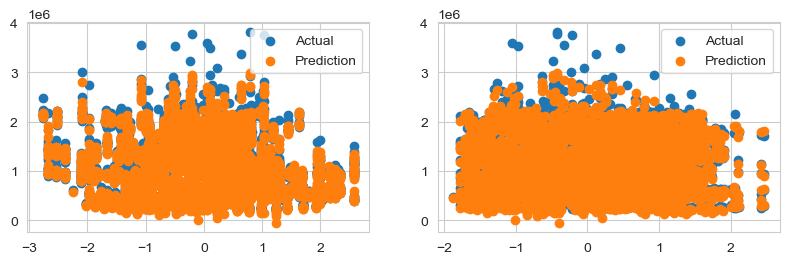



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9731756136656928
Residual Sum of Squares (RSS) on Training set  ---> 41340032727864.26
Mean Squared Error (MSE) on Training set       ---> 8681233248.186531
Root Mean Squared Error (RMSE) on Training set ---> 93173.13587180873

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -7.608724695076692e+20
Residual Sum of Squares (RSS) on Training set  ---> 3.0996367727997333e+35
Mean Squared Error (MSE) on Training set       ---> 2.6025497672541846e+32
Root Mean Squared Error (RMSE) on Training set ---> 1.6132420051728708e+16

--------------------Residual Plots--------------------


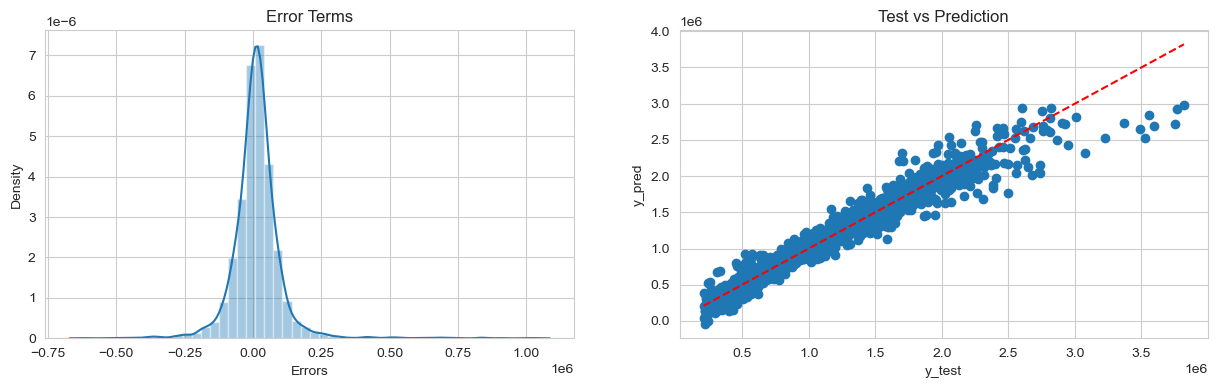

In [28]:
#Using the 2nd Order Polynomial Regression model (degree=2)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

In [29]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC


Train-R2       Test-R2     Train-RSS  \
Multiple Linear Regression (MLR)  0.938433  9.365084e-01  9.488368e+13   
Ridge Linear Regression (RLR)     0.938432  9.365319e-01  9.488487e+13   
Lasso Linear Regression (LLR)     0.938433  9.365071e-01  9.488371e+13   
Elastic-Net Regression (ENR)      0.819978  8.197469e-01  2.774377e+14   
Polynomial Regression (PNR)       0.973176 -7.608725e+20  4.134003e+13   

                                      Test-RSS     Train-MSE      Test-MSE  \
Multiple Linear Regression (MLR)  2.586515e+13  1.992517e+10  2.171717e+10   
Ridge Linear Regression (RLR)     2.585560e+13  1.992542e+10  2.170916e+10   
Lasso Linear Regression (LLR)     2.586568e+13  1.992518e+10  2.171761e+10   
Elastic-Net Regression (ENR)      7.343136e+13  5.826074e+10  6.165522e+10   
Polynomial Regression (PNR)       3.099637e+35  8.681233e+09  2.602550e+32   

                                     Train-RMSE     Test-RMSE  
Multiple Linear Regression (MLR)  141156.559517  1.473675e+05  
Ridge Linear Regression (RLR)     141157.445934  1.473403e+05  
Lasso Linear Regression (LLR)     141156.578280  1.473690e+05  
Elastic-Net Regression (ENR)      241372.623594  2.483047e+05  
Polynomial Regression (PNR)        93173.135872  1.613242e+16

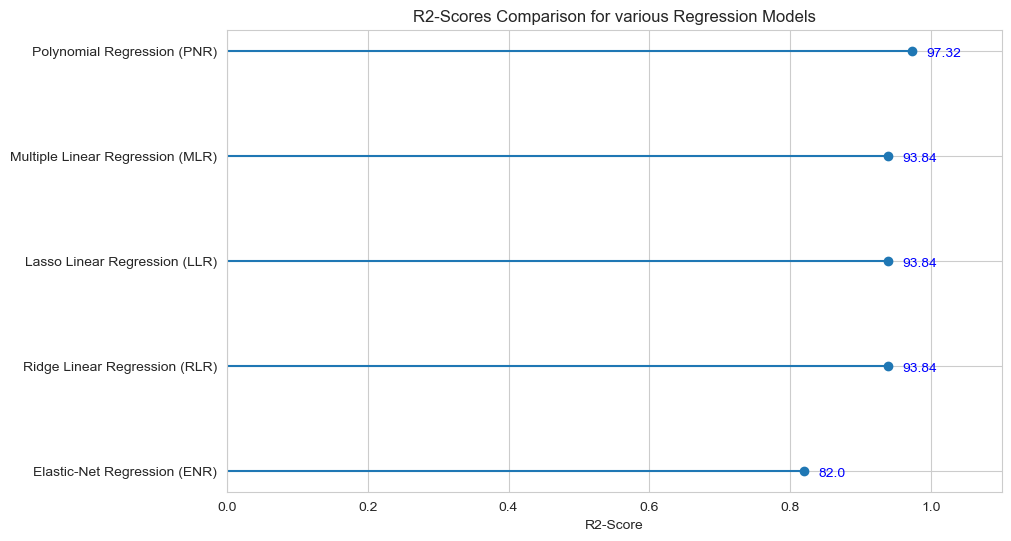

In [30]:
      # R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()                                                                                                                                                          

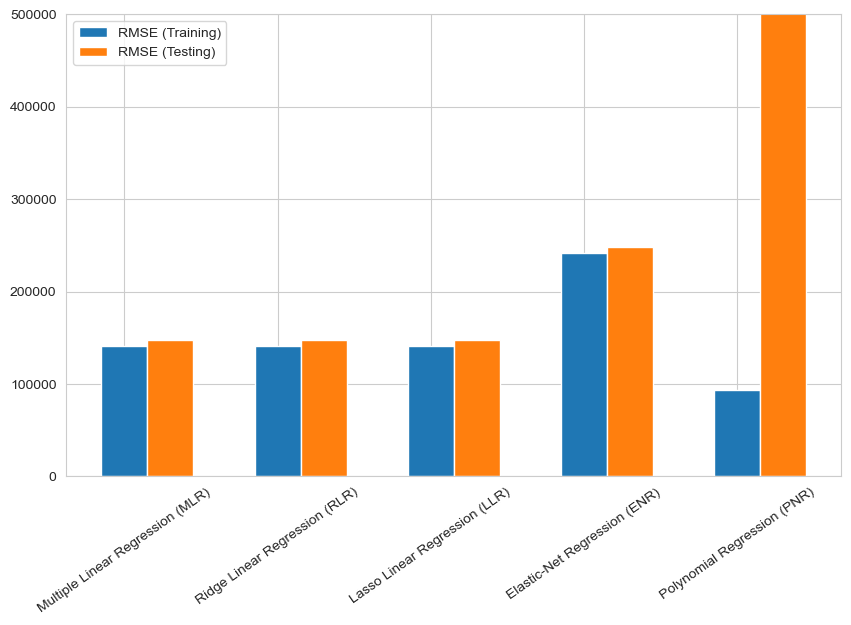

In [31]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5

plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.ylim([0,500000])
plt.show()